In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [174]:
tickerSymbol = 'AAPl'   #EMG.L
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d',start='2017-4-1',end='2022-6-1',)
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-04-03 00:00:00-04:00,33.768534,33.864872,33.613448,33.766182,79942800,0.0,0.0
2017-04-04 00:00:00-04:00,33.660447,34.045809,33.641648,34.017612,79565600,0.0,0.0
2017-04-05 00:00:00-04:00,33.888376,34.179748,33.792034,33.841381,110871600,0.0,0.0
2017-04-06 00:00:00-04:00,33.904823,33.958870,33.707443,33.756790,84596000,0.0,0.0
2017-04-07 00:00:00-04:00,33.773240,33.878978,33.665152,33.681599,66688800,0.0,0.0


In [175]:
#tickerDfResample = pd.DataFrame(tickerDf.resample('2d').sum())
#tickerDfResample[tickerDfResample == 0] = None
#tickerDfResample = tickerDfResample.interpolate(method='linear')
#tickerDfResample.index = pd.to_datetime(tickerDfResample.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')
#tickerDfResample
tickerDfResample = tickerDf
tickerDfResample = tickerDfResample.reset_index()

In [176]:
tickerDfResample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          1300 non-null   datetime64[ns, America/New_York]
 1   Open          1300 non-null   float64                         
 2   High          1300 non-null   float64                         
 3   Low           1300 non-null   float64                         
 4   Close         1300 non-null   float64                         
 5   Volume        1300 non-null   int64                           
 6   Dividends     1300 non-null   float64                         
 7   Stock Splits  1300 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 81.4 KB


In [177]:
first_diff = tickerDfResample.Close.values[1:]-tickerDfResample.Close.values[:-1]
first_diff = np.concatenate([first_diff,[0]])
tickerDfResample['FirstDifference'] = first_diff
#tickerDf.Close.pct_change().dropna()
tickerDfResample

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,FirstDifference
0,2017-04-03 00:00:00-04:00,33.768534,33.864872,33.613448,33.766182,79942800,0.0,0.0,0.251431
1,2017-04-04 00:00:00-04:00,33.660447,34.045809,33.641648,34.017612,79565600,0.0,0.0,-0.176231
2,2017-04-05 00:00:00-04:00,33.888376,34.179748,33.792034,33.841381,110871600,0.0,0.0,-0.084591
3,2017-04-06 00:00:00-04:00,33.904823,33.958870,33.707443,33.756790,84596000,0.0,0.0,-0.075191
4,2017-04-07 00:00:00-04:00,33.773240,33.878978,33.665152,33.681599,66688800,0.0,0.0,-0.039951
...,...,...,...,...,...,...,...,...,...
1295,2022-05-24 00:00:00-04:00,140.381795,141.538271,136.912382,139.933167,104132700,0.0,0.0,0.159531
1296,2022-05-25 00:00:00-04:00,138.009041,141.358824,137.919318,140.092697,92482700,0.0,0.0,3.250061
1297,2022-05-26 00:00:00-04:00,136.972191,143.901053,136.722951,143.342758,90601500,0.0,0.0,5.842194
1298,2022-05-27 00:00:00-04:00,144.947876,149.224823,144.818266,149.184952,90978500,0.0,0.0,-0.797562


In [178]:
def ad_test(dataset):
    dftest = adfuller(dataset,autolag = 'AIC')
    print("1. ADF: ",dftest[0])
    print("2. P_value: ",dftest[1])
    print("3. num_lags: ",dftest[2])
    print("4. : ",dftest[3])
    print("5. crit_value: ",dftest[4])
    for key,val in dftest[4].items():
        print("\t",key,": ",val)

In [179]:
ad_test(tickerDfResample['FirstDifference'])

1. ADF:  -13.166535949662636
2. P_value:  1.2756032641244188e-24
3. num_lags:  7
4. :  1292
5. crit_value:  {'1%': -3.4354214704688113, '5%': -2.863779629316101, '10%': -2.567962394851863}
	 1% :  -3.4354214704688113
	 5% :  -2.863779629316101
	 10% :  -2.567962394851863


In [180]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [182]:
stepwise_fit = auto_arima(tickerDfResample['Close'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5313.795, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5313.431, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5309.023, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5308.897, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5314.327, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5310.616, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5310.782, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5312.582, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5310.265, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.392 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1300
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2651.449
Date:                Tue, 24 Jan 2023   AIC                           5308.897
Time:                        11:21:05   BIC                           5324.405
Sample:                             0   HQIC                          5314.716
                               - 1300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0882      0.048      1.833      0.067      -0.006       0.183
ma.L1         -0.0717      0.017     -4.106      0.000      -0.106      -0.037
sigma2         3.4708      0.072     48.115      0.000       3.329       3.612
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1453.89
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              15.46   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [209]:
predictions = []
trainData = np.array(tickerDfResample['Close'][700:1230])
testData = np.array(tickerDfResample['Close'][1230:])
for i in range(len(testData)):
    model = ARIMA(trainData,order=(0,1,1))
    modelFit = model.fit()
   
    futureForcast = modelFit.forecast()
    predictions.append(futureForcast[0])
    trainData = np.append(trainData,testData[i])
    trainData = trainData[1:]
    
    
predictions = np.array(predictions)    

In [210]:
predictions,testData

(array([168.35808326, 166.66066781, 163.76960337, 159.60150589,
        161.86243337, 163.97502706, 164.35282547, 162.57695491,
        165.61725672, 165.48940418, 162.62012411, 158.8130572 ,
        156.84395901, 161.90397824, 158.07037446, 154.27746053,
        150.17924078, 154.1376897 , 158.61166398, 159.82902243,
        163.06690472, 164.55763244, 167.89206756, 169.37258638,
        173.11530926, 173.89778722, 174.7679239 , 177.99539756,
        177.01790933, 173.96842375, 173.5444528 , 177.45081479,
        174.41609283, 171.19180454, 171.35782051, 169.404101  ,
        165.17318513, 166.84598011, 169.55367968, 164.7322498 ,
        164.33460206, 166.63619066, 166.47632427, 165.66700591,
        161.03684406, 162.14988857, 156.09672517, 155.86444229,
        162.9184216 , 157.00492322, 157.24633727, 158.7506806 ,
        165.24597651, 156.27590708, 156.78925421, 151.72322638,
        153.97862834, 146.29843273, 142.2116957 , 146.54423351,
        145.1388919 , 148.67093189, 140.

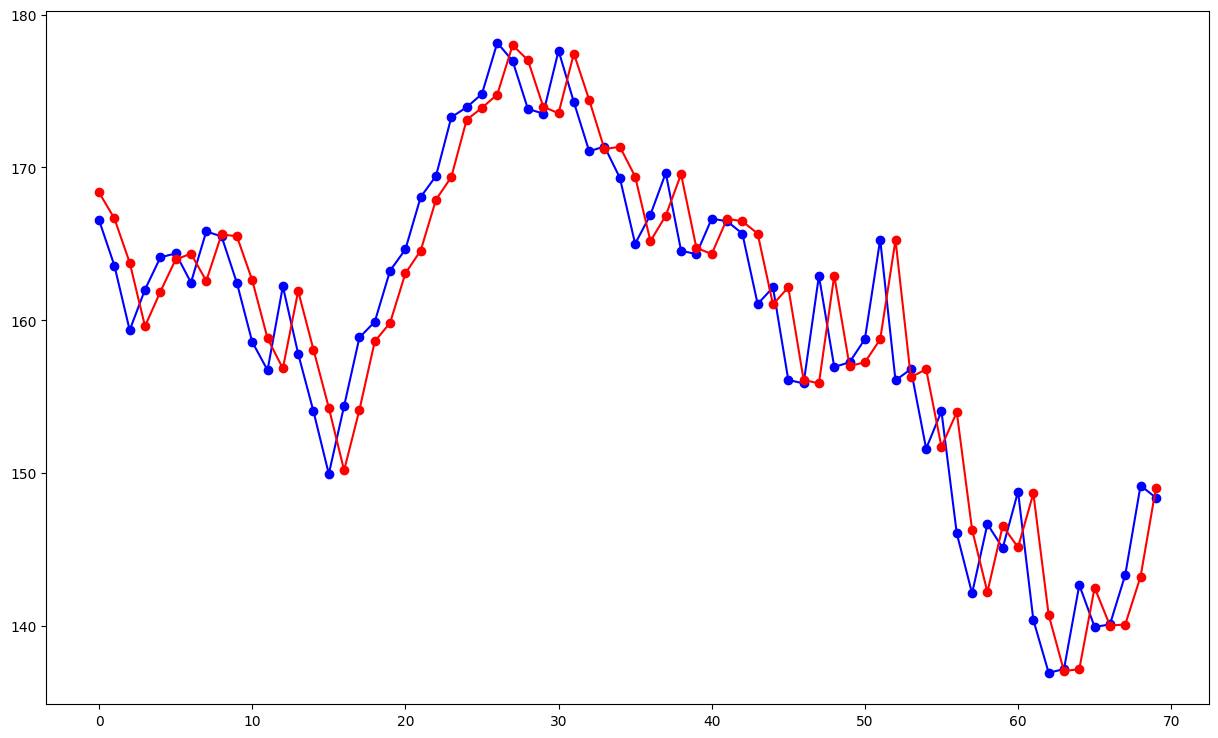

In [212]:
plt.figure(figsize=(15,9))
plt.plot(testData,'-bo')
plt.plot(predictions,'-ro')